In [43]:
import os
import torch.nn as nn
import numpy as np
from random import shuffle
import torch
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import DataLoader
from tqdm import tqdm
# from preprocess.focal_loss import FocalLoss
# from utils.svdd_loss import SVDDLoss
from dataloader.svdd_dataloader_mld import get_sub_seqs,get_0sub_seqs_label
from nets.gaussianNet_mld import GaussianSVDDModel 
from utils.reconstruction_loss import ReconstructionLoss_audio as ReconstructionLoss
%matplotlib inline
torch.manual_seed(42)
np.random.seed(42)

seq_len = 100
stride  = 10
# Paths
train_data = np.load('/home/iot/collision_detect/OmniAnomaly/processed/MSL_train.pkl',allow_pickle=True)
test_data  = np.load('/home/iot/collision_detect/OmniAnomaly/processed/MSL_test.pkl',allow_pickle=True)
test_label = np.load('/home/iot/collision_detect/OmniAnomaly/processed/MSL_test_label.pkl',allow_pickle=True)

train_seqs = get_sub_seqs(train_data, seq_len=seq_len, stride=stride)
train_data = train_seqs

test_seq   = get_sub_seqs(test_data, seq_len=seq_len, stride=stride)
test_data  = test_seq

test_label = get_sub_seqs_label(test_label,seq_len,stride)


workers = 4
feature_dim = 64
batchsize = 64
use_attention = 1

checkpoint_path = f'/home/iot/collision_detect/output/open_dataset/Gaussian_{feature_dim}'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
reconstruction_loss_fn = ReconstructionLoss()
loss_function = nn.MSELoss()
model = GaussianSVDDModel(feature_dim=feature_dim,is_train=0).to(device)
model = model.to(device)
model.load_checkpoint(checkpoint_path)


cuda
Model loaded from /home/iot/collision_detect/output/open_dataset/Gaussian_64.


In [44]:
print(test_label.shape)

(7363,)


In [12]:
index = 157
print(test_label[index])
for i in range(55):
    print(i)
    print(test_data[index][:,i])



0.0
0
[-0.62558502 -0.60842434 -0.58190328 -0.57878315 -0.57566303 -0.56474259
 -0.56162246 -0.55850234 -0.55538222 -0.55382215 -0.55070203 -0.5475819
 -0.54290172 -0.53666147 -0.53042122 -0.52106084 -0.51326053 -0.50546022
 -0.4773791  -0.47425897 -1.         -0.99531981 -0.99531981 -1.
 -0.99687988 -0.99375975 -0.99375975 -0.99375975 -0.98283931 -0.97035881
 -0.96411856 -0.95631825 -0.94383775 -0.94071763 -1.         -0.99531981
 -0.98907956 -0.98595944 -0.97347894 -0.97035881 -1.         -0.98283931
 -0.95163807 -0.94695788 -0.94383775 -0.94383775 -0.94071763 -0.9375975
 -0.93291732 -0.92667707 -0.91419657 -0.90795632 -0.90015601 -0.89859594
 -0.89703588 -0.85023401 -0.83775351 -0.83619345 -1.         -0.98283931
 -0.97659906 -0.97347894 -0.96723869 -0.95943838 -0.95943838 -0.95787832
 -0.95475819 -0.95319813 -0.950078   -0.94383775 -0.93915757 -0.92043682
 -0.90795632 -0.90483619 -1.         -0.99843994 -0.97971919 -0.97815913
 -0.9625585  -0.96099844 -0.95319813 -0.94539782 -0.939

In [13]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import multivariate_normal
# cov = model.sigma_inv.detach().cpu().numpy()
# mu = model.mu.cpu().numpy()


# # Create a grid of points
# x, y = np.mgrid[-100:100:1, -100:100:1]
# pos = np.dstack((x, y))

# # Calculate the Gaussian distribution values
# rv1 = multivariate_normal(mu, cov)

# z1 = rv1.pdf(pos)


# # Plotting the Gaussian distributions
# plt.figure(figsize=(10, 8))
# plt.contour(x, y, z1, levels=10, cmap='Blues', alpha=0.7, linestyles='solid')
# plt.title('Contour Plot of Two Gaussian Distributions')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.grid(True)
# plt.show()


In [14]:
# model.eval()
# sample_idx = 236# p
# # Assuming the necessary libraries and data are already imported and available in the current context

# # Your existing code to get the anomaly score, reconstructed audio, and reconstructed IMU
# spec, image, audio, _, _ = val_data[sample_idx]
# spec, image, audio = spec.unsqueeze(0).to(device), image.unsqueeze(0).to(device), audio.unsqueeze(0).to(device)

# _,_, reconstructed_audio, reconstructed_imu = model(audio, image)
# reconstruction_loss = reconstruction_loss_fn(audio, reconstructed_audio)

# # target_zero = random_tensor.unsqueeze(0).expand(1, -1)
# # svdd_loss = loss_function(anomaly_score, target_zero)
# # total_loss = svdd_loss + reconstruction_loss

# # # Print the losses
# # print(f"Reconstruction Loss {reconstruction_loss.item():.4f}")
# # print(f"SVDD Loss for Sample: {svdd_loss.item():.4f}")

# # Prepare data for plotting
# original_audio = audio.cpu().detach().numpy().squeeze()[0]
# reconstructed_audio = reconstructed_audio.cpu().detach().numpy().squeeze()[0]

# original_imu = image.cpu().detach().numpy().squeeze()
# reconstructed_imu = reconstructed_imu.cpu().detach().numpy().squeeze()
# # Calculate errors
# audio_error = original_audio - reconstructed_audio
# imu_error = original_imu - reconstructed_imu

# # Plotting
# fig, axes = plt.subplots(4, 1, figsize=(12, 8))

# # Original and reconstructed audio signals
# axes[0].plot(original_audio, label='Original Audio')
# axes[0].plot(reconstructed_audio, label='Reconstructed Audio', linestyle='dashed')
# # axes[0].legend()
# # axes[0].set_title('Original and Reconstructed Audio')
# axes[0].set_ylim(-0.5, 0.5)

# # Error in audio signals
# axes[1].plot(audio_error, label='Audio Error', color='red',linestyle='dashed')
# # axes[1].legend()
# # axes[1].set_title('Audio Reconstruction Error')
# axes[1].set_ylim(-0.5, 0.5)

# # Original and reconstructed IMU signals
# axes[2].plot(original_imu, label='Original IMU')
# axes[2].plot(reconstructed_imu, label='Reconstructed IMU', linestyle='dashed')
# # axes[2].legend()
# # axes[2].set_title('Original and Reconstructed IMU')
# axes[2].set_ylim(0.5, 1.5)

# # Error in IMU signals
# axes[3].plot(imu_error, label='IMU Error', color='red', linestyle='dashed')
# # axes[3].legend()
# # axes[3].set_title('IMU Reconstruction Error')
# axes[3].set_ylim(-0.5, 0.5)

# plt.tight_layout()
# plt.show()



tensor([1.0139], device='cuda:0', grad_fn=<SqrtBackward0>) 0.0


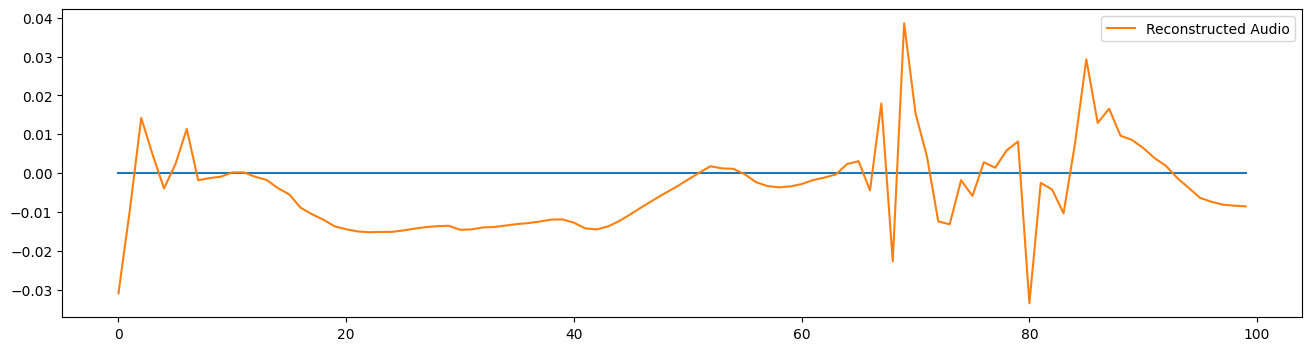

In [15]:
model.eval()
sample_idx = 19# print(audio.shape)5
# Change this to the index of the sample you want to load
input_data = train_data[sample_idx]
label      = test_label[sample_idx]

input_data = torch.tensor(input_data).float().to(device).unsqueeze(0)

distances, x_recon,z = model(input_data)
print(distances,label)
reconstruction_loss = reconstruction_loss_fn( input_data, x_recon)
# target_zero = random_tensor.unsqueeze(0).expand(1, -1)
# svdd_loss = loss_function(anomaly_score, target_zero)

# print(f"Reconstruction Loss {reconstruction_loss.item():.4f}")
# print(f"SVDd Loss for Sample: {svdd_loss.item():.4f}")
plt.figure(figsize=(16, 4))
plt.plot(input_data.cpu().numpy().squeeze()[:,3])
plt.plot(x_recon.cpu().detach().numpy().squeeze()[:,54], label='Reconstructed Audio')
plt.legend()



In [16]:
input_data.shape

torch.Size([1, 100, 55])

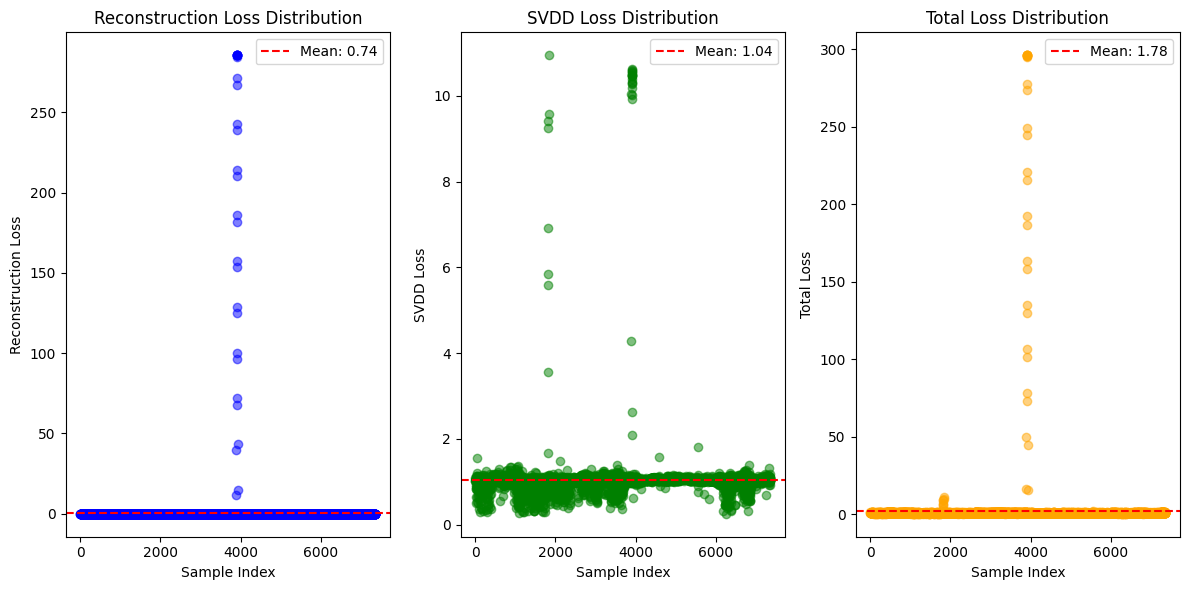

In [17]:
import matplotlib.pyplot as plt

# Initialize lists to store individual loss values
reconstruction_losses_val = []
svdd_losses_val = []
total_losses_val = []
total_sample = 0
# Iterate over the dataset to collect individual losses
with torch.no_grad():
    for sample_idx in range(len(test_data)):
        input_data = test_data[sample_idx]
        input_data = torch.tensor(input_data).float().to(device).unsqueeze(0)
        # print(image.shape,audio.shape,sample_idx)
        distances, x_recon,z  = model(input_data)

        reconstruction_loss = reconstruction_loss_fn( input_data,x_recon)
        svdd_loss = distances

        total_loss = svdd_loss + reconstruction_loss
        reconstruction_losses_val.append(reconstruction_loss.item())
        svdd_losses_val.append(svdd_loss.item())
        total_losses_val.append(total_loss.item())
        total_sample+=1

# Plotting the data distribution of losses using scatter plots
mean_reconstruction_loss = sum(reconstruction_losses_val) / len(reconstruction_losses_val)
mean_svdd_loss = sum(svdd_losses_val) / len(svdd_losses_val)
mean_total_loss = sum(total_losses_val) / len(total_losses_val)

# Plotting the data distribution of losses using scatter plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(range(total_sample), reconstruction_losses_val, color='blue', alpha=0.5)
plt.axhline(y=mean_reconstruction_loss, color='red', linestyle='--', label=f'Mean: {mean_reconstruction_loss:.2f}')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Loss')
plt.title('Reconstruction Loss Distribution')
# plt.ylim(min(reconstruction_losses), 0.8)
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(range(total_sample), svdd_losses_val, color='green', alpha=0.5)
plt.axhline(y=mean_svdd_loss, color='red', linestyle='--', label=f'Mean: {mean_svdd_loss:.2f}')
plt.xlabel('Sample Index')
plt.ylabel('SVDD Loss')
plt.title('SVDD Loss Distribution')
# plt.ylim(min(svdd_losses_val), 0.32)
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(range(total_sample), total_losses_val, color='orange', alpha=0.5)
plt.axhline(y=mean_total_loss, color='red', linestyle='--', label=f'Mean: {mean_total_loss:.2f}')
plt.xlabel('Sample Index')
plt.ylabel('Total Loss')
plt.title('Total Loss Distribution')
# plt.ylim(min(total_losses),2)
plt.legend()

plt.tight_layout()
plt.show()

In [63]:
svdd_losses_val = np.array(svdd_losses_val)
reconstruction_losses_val = np.array(reconstruction_losses_val)

In [64]:
svdd_loss_normal  = svdd_losses_val[test_label==0]
svdd_loss_anomaly = svdd_losses_val[test_label==1]
print(np.mean(svdd_loss_normal),np.mean(svdd_loss_anomaly))

1.0121127356116364 1.207765332610074


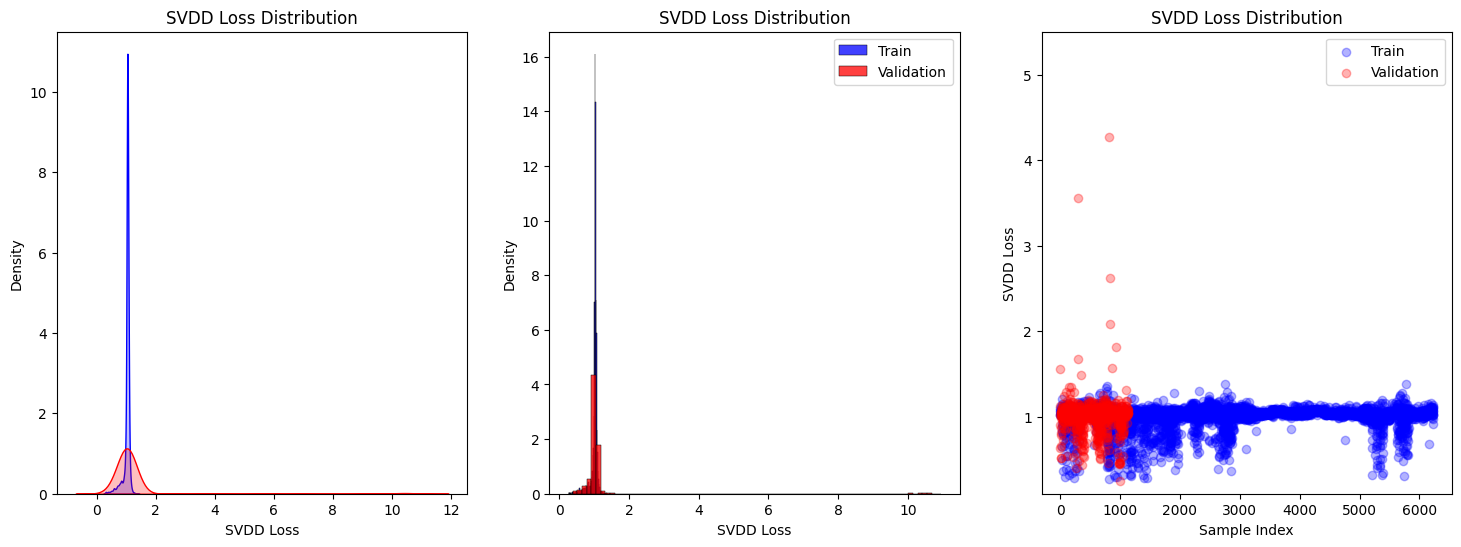

In [20]:
import seaborn as sns

# Plotting KDE plots
plt.figure(figsize=(18, 6))

plt.subplot(1,3, 1)
sns.kdeplot(svdd_loss_normal, color='blue', label='Train', fill=True)
sns.kdeplot(svdd_loss_anomaly, color='red', label='Validation', fill=True)
plt.xlabel('SVDD Loss')
plt.ylabel('Density')
plt.title('SVDD Loss Distribution')


plt.subplot(1, 3, 2)
sns.histplot(svdd_loss_normal, color='blue', label='Train', kde=False, bins=80, stat="density")
sns.histplot(svdd_loss_anomaly, color='red', label='Validation', kde=False, bins=80, stat="density")
plt.xlabel('SVDD Loss')
plt.ylabel('Density')
plt.title('SVDD Loss Distribution')
# plt.ylim(0, 1)
# plt.xlim(0, 0.4)
plt.legend()

plt.subplot(1, 3,3)
plt.scatter(range(len(svdd_loss_normal)), svdd_loss_normal, color='blue', alpha=0.3, label='Train')
plt.scatter(range(len(svdd_loss_anomaly)), svdd_loss_anomaly, color='red', alpha=0.3, label='Validation')
plt.xlabel('Sample Index')
plt.ylabel('SVDD Loss')
plt.ylim(0.1,5.5)
plt.title('SVDD Loss Distribution')
plt.legend()

# plt.ylim(0, 1)
# plt.xlim(0, 40)

In [61]:
reconstruction_losses_val

[0.005128168035298586,
 0.005444601643830538,
 0.005222656764090061,
 0.005284132901579142,
 0.0054634311236441135,
 0.00535920262336731,
 0.005488496273756027,
 0.005234533920884132,
 0.004942244850099087,
 0.005112250801175833,
 0.005192859098315239,
 0.0045927404426038265,
 0.004902974236756563,
 0.004846696276217699,
 0.004559556487947702,
 0.004872603341937065,
 0.005249655805528164,
 0.005084390752017498,
 0.005621766205877066,
 0.005720697343349457,
 0.005646804813295603,
 0.005466525908559561,
 0.004908860195428133,
 0.004683463368564844,
 0.004497049376368523,
 0.0038154865615069866,
 0.0037624614778906107,
 0.004265700001269579,
 0.004449636675417423,
 0.00448494590818882,
 0.00459368247538805,
 0.005114608909934759,
 0.005128686781972647,
 0.005682727787643671,
 0.00604430865496397,
 0.006664910353720188,
 0.006506068632006645,
 0.006534986197948456,
 0.00591300381347537,
 0.005579365883022547,
 0.005674267187714577,
 0.006164312828332186,
 0.006539317779242992,
 0.005632617

In [60]:
from deepod.metrics import ts_metrics
from deepod.metrics import point_adjustment 
test_label =  (test_label > 0).astype(int)
eval_metrics_svdd = ts_metrics(test_label,reconstruction_losses_val)
print(eval_metrics_svdd)

(0.631531276921034, 0.24010467500617105, 0.3364630652008887, 0.23359670216420475, 0.601237842617153)


In [65]:
adj_eval_metrics = ts_metrics(test_label, point_adjustment(test_label,reconstruction_losses_val))
print(adj_eval_metrics)


(0.8209241199978663, 0.44681546357276297, 0.5377066635777945, 0.4251928020565553, 0.731211317418214)


NameError: name 'reconstruction_losses_train' is not defined

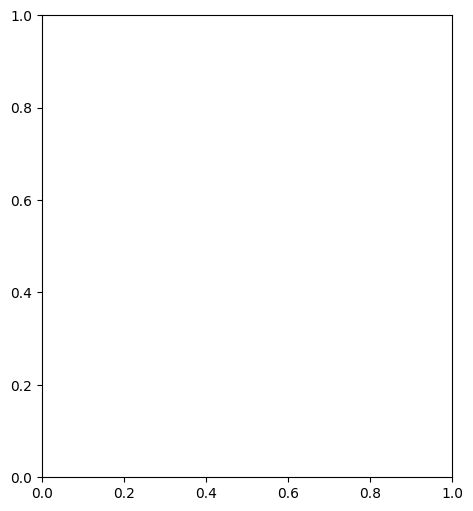

In [132]:
import seaborn as sns

# Plotting KDE plots
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.kdeplot(reconstruction_losses_train, color='blue', label='Train', fill=True)
sns.kdeplot(reconstruction_losses_val, color='red', label='Validation', fill=True)
plt.xlabel('Reconstruction Loss')
plt.ylabel('Density')
plt.title('Reconstruction Loss Distribution')
plt.legend()

plt.subplot(1, 3, 2)
sns.kdeplot(svdd_losses_train, color='blue', label='Train', fill=True)
sns.kdeplot(svdd_losses_val, color='red', label='Validation', fill=True)
plt.xlabel('SVDD Loss')
plt.ylabel('Density')
plt.title('SVDD Loss Distribution')
# plt.ylim(0, 1)
# plt.xlim(0, 40)
plt.legend()

plt.subplot(1, 3, 3)
sns.kdeplot(total_losses_train, color='blue', label='Train', fill=True)
sns.kdeplot(total_losses_val, color='red', label='Validation', fill=True)
plt.xlabel('Total Loss')
plt.ylabel('Density')
plt.title('Total Loss Distribution')
plt.legend()

plt.tight_layout()
plt.show()


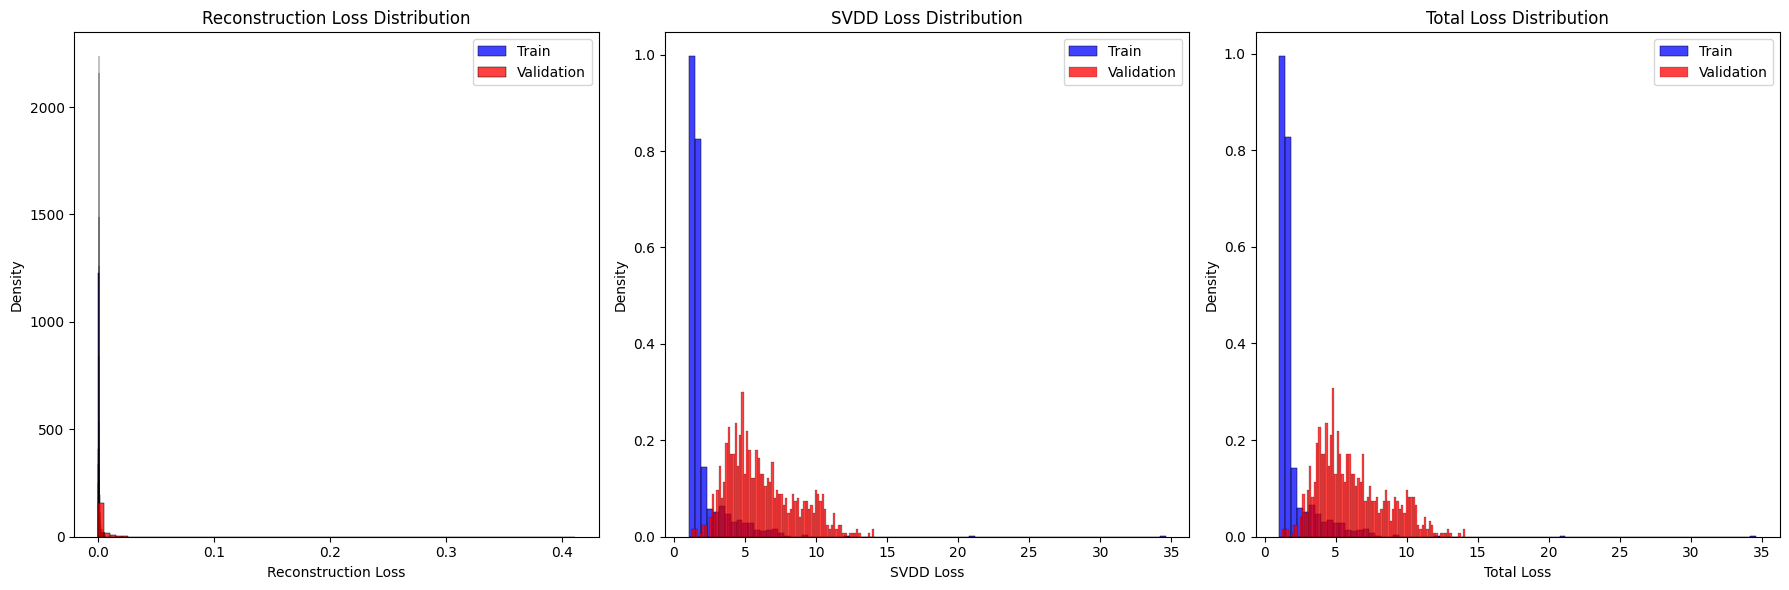

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting histograms
plt.figure(figsize=(18, 6))

# Plot for Reconstruction Loss Distribution
plt.subplot(1, 3, 1)
sns.histplot(reconstruction_losses_train, color='blue', label='Train', kde=False, bins=80, stat="density")
sns.histplot(reconstruction_losses_val, color='red', label='Validation', kde=False, bins=80, stat="density")
plt.xlabel('Reconstruction Loss')
plt.ylabel('Density')
plt.title('Reconstruction Loss Distribution')
plt.legend()

# Plot for SVDD Loss Distribution
plt.subplot(1, 3, 2)
sns.histplot(svdd_losses_train, color='blue', label='Train', kde=False, bins=80, stat="density")
sns.histplot(svdd_losses_val, color='red', label='Validation', kde=False, bins=80, stat="density")
plt.xlabel('SVDD Loss')
plt.ylabel('Density')
plt.title('SVDD Loss Distribution')
# plt.ylim(0, 1)
# plt.xlim(0, 0.4)
plt.legend()

# Plot for Total Loss Distribution
plt.subplot(1, 3, 3)
sns.histplot(total_losses_train, color='blue', label='Train', kde=False, bins=80, stat="density")
sns.histplot(total_losses_val, color='red', label='Validation', kde=False, bins=80, stat="density")
plt.xlabel('Total Loss')
plt.ylabel('Density')
plt.title('Total Loss Distribution')

plt.legend()

plt.tight_layout()
plt.show()


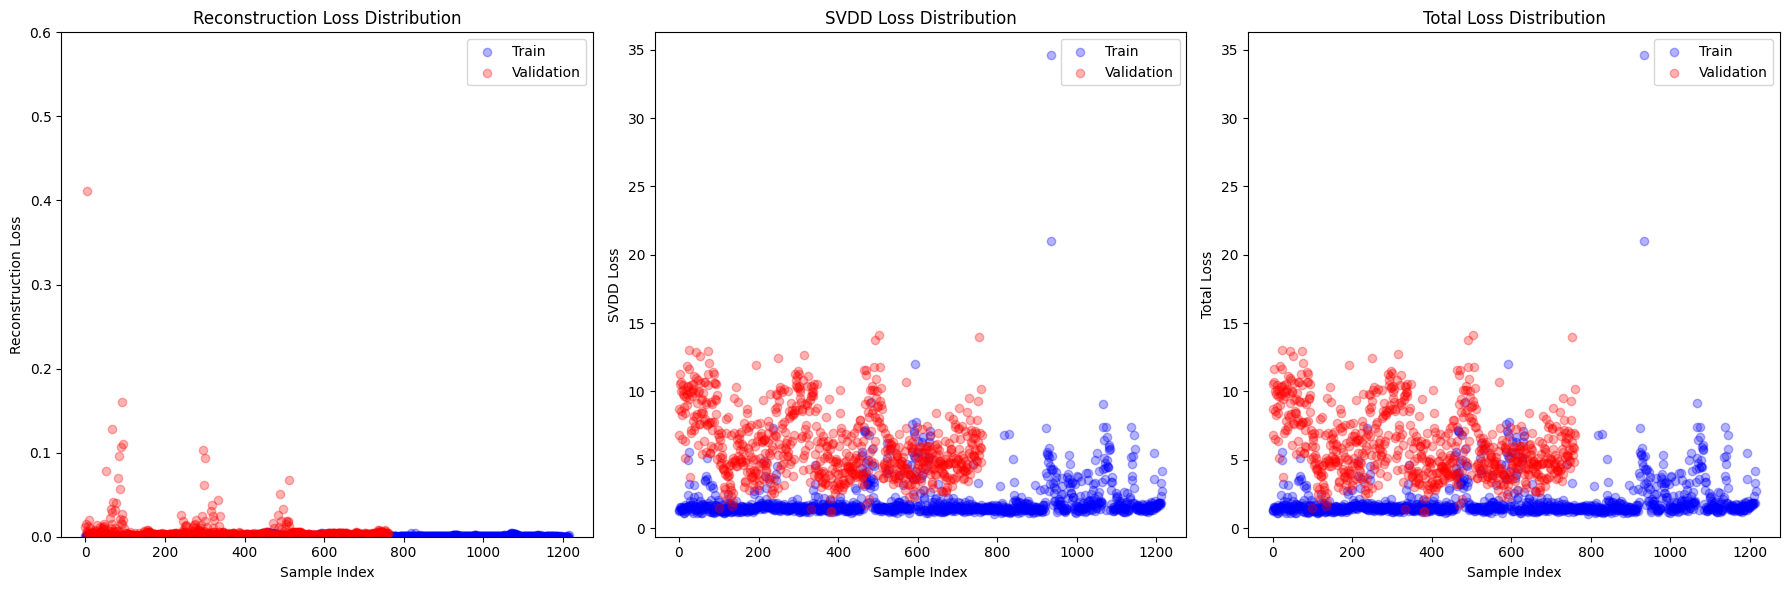

In [133]:
import matplotlib.pyplot as plt

# Plotting scatter plots
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(range(len(reconstruction_losses_train)), reconstruction_losses_train, color='blue', alpha=0.3, label='Train')
plt.scatter(range(len(reconstruction_losses_val)), reconstruction_losses_val, color='red', alpha=0.3, label='Validation')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Loss')
plt.title('Reconstruction Loss Distribution')
plt.ylim(0,0.6)
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(range(len(svdd_losses_train)), svdd_losses_train, color='blue', alpha=0.3, label='Train')
plt.scatter(range(len(svdd_losses_val)), svdd_losses_val, color='red', alpha=0.3, label='Validation')
plt.xlabel('Sample Index')
plt.ylabel('SVDD Loss')
# plt.ylim(0,0.3)
plt.title('SVDD Loss Distribution')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(range(len(total_losses_train)), total_losses_train, color='blue', alpha=0.3, label='Train')
plt.scatter(range(len(total_losses_val)), total_losses_val, color='red', alpha=0.3, label='Validation')
plt.xlabel('Sample Index')
plt.ylabel('Total Loss')
# plt.ylim(0.5,5)
plt.title('Total Loss Distribution')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# from deepod.metrics import ts_metrics
# from deepod.metrics import point_adjustment 
# def z_score_normalization(data):
#     mean = np.mean(data)
#     std_dev = np.std(data)
#     normalized_data = [(x - mean) / std_dev for x in data]
#     return normalized_data


# loss_all_audio = svdd_losses_train+svdd_losses_val
# loss_all_audio = np.array(loss_all_audio)
# loss_all_audio = z_score_normalization(loss_all_audio)


# loss_all_recons = reconstruction_losses_train+reconstruction_losses_val
# loss_all_recons = np.array(loss_all_recons)
# loss_all_recons = z_score_normalization(loss_all_recons)

In [313]:
from deepod.metrics import ts_metrics
from deepod.metrics import point_adjustment 
def z_score_normalization(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    normalized_data = [(x - mean) / std_dev for x in data]
    return normalized_data

def z_score_normalization2(data):
    normalized_data = data-min(data)/(max(data)-min(data))
    return normalized_data


loss_all_audio = svdd_losses_train+svdd_losses_val
w2 = []
for loss in loss_all_audio:
    if loss > 1.75:
        w = 0
    else:
        w = 0.5
    w2.append(w)

# Compute w1 as the complement of w2
w1 = [1 - w for w in w2]
loss_all_audio = np.array(loss_all_audio)
loss_all_audio = z_score_normalization(loss_all_audio)


loss_all_recons = reconstruction_losses_train+reconstruction_losses_val
loss_all_recons = np.array(loss_all_recons)
loss_all_recons = z_score_normalization(loss_all_recons)

In [314]:
 loss_all_audio

array([-0.74581431, -0.73435387, -0.72977753, ...,  0.86088755,
        2.38732009,  1.20559972])

In [315]:
loss_all_recons

array([-0.18891717, -0.18987051, -0.19444403, ...,  0.08255681,
        0.090627  ,  0.17560193])

In [316]:
# labels_all = np.concatenate([np.zeros(len(svdd_losses_train)),np.ones(len(svdd_losses_val))])
# loss_all = [0.5*x + 0.5*y for x, y in zip(loss_all_audio, loss_all_recons)]


In [326]:
labels_all = np.concatenate([np.zeros(len(svdd_losses_train)),np.ones(len(svdd_losses_val))])
loss_all = [ x + 20*y for w1_i, w2_i, x, y in zip(w1, w2, loss_all_audio, loss_all_recons)]

In [327]:
eval_metrics_svdd = ts_metrics(labels_all, (loss_all_audio))
eval_metrics_recons = ts_metrics(labels_all, (loss_all_recons))
eval_metrics_all = ts_metrics(labels_all, (loss_all))

In [328]:
print(eval_metrics_svdd)
print(eval_metrics_recons)
print(eval_metrics_all)

(0.9503406029838375, 0.8939780203617164, 0.8791419666560103, 0.8012958963282938, 0.973753280839895)
(0.9560475376433208, 0.9228618407413013, 0.8947658212141298, 0.8805590851334181, 0.9094488188976378)
(0.9628045569139384, 0.928362334851217, 0.9083870592107123, 0.8873591989987485, 0.9304461942257218)


In [348]:
x = np.load('/home/iot/collision_detect/OmniAnomaly/processed/SMAP_test.pkl',allow_pickle=True)

In [28]:
# from sklearn.metrics import confusion_matrix
# import numpy as np
# model.eval()
# random_tensor = torch.load('center.pth').to(device)
# true_labels = []
# predicted_labels = []
# threshold = 0.45

# with torch.no_grad():
#     for sample_idx in range(len(val_data)):
#         spec, image, audio = val_data[sample_idx]

#         spec, image, audio = spec.unsqueeze(0).to(device), image.unsqueeze(0).to(device), audio.unsqueeze(0).to(device)

#         anomaly_score, reconstructed_audio, reconstructed_imu = model(audio, image)

#         reconstruction_loss = reconstruction_loss_fn(image, reconstructed_imu, audio, reconstructed_audio) * 10

#         target_zero = random_tensor.unsqueeze(0).expand(spec.size(0), -1)

#         # Calculate SVDD loss for the sample
#         svdd_loss = loss_function(anomaly_score, target_zero)*100

#         # Calculate total loss for the sample
#         total_loss = svdd_loss + reconstruction_loss

#         # Predict class based on total loss
#         if svdd_loss<=mean_svdd_loss:
#             predicted_class=0
#         else:
#             predicted_class=1

#         # Handle ground truth class
#         true_class = 1

#         # Update confusion matrix variables
#         true_labels.append(true_class)
#         predicted_labels.append(predicted_class)

# # Construct confusion matrix
# conf_matrix = confusion_matrix(true_labels, predicted_labels)

# print("Confusion Matrix:")
# print(conf_matrix)


In [380]:
import torch.nn as nn
import torch.nn.functional as F
import torch
# from svdd_detectnet import DetectNet
import torch.nn.functional as F
import importlib
import torch
import numpy as np
from torch.nn.utils import weight_norm


def _handle_n_hidden(n_hidden):
    if type(n_hidden) == int:
        n_layers = 1
        hidden_dim = n_hidden
    elif type(n_hidden) == str:
        n_hidden = n_hidden.split(',')
        n_hidden = [int(a) for a in n_hidden]
        n_layers = len(n_hidden)
        hidden_dim = int(n_hidden[0])

    else:
        raise TypeError('n_hidden should be a string or a int.')

    return hidden_dim, n_layers

def _instantiate_class(module_name: str, class_name: str):
    module = importlib.import_module(module_name)
    class_ = getattr(module, class_name)
    return class_()

class ConvSeqEncoder(torch.nn.Module):
    """
    this network architecture is from NeurTraL-AD
    """
    def __init__(self, n_features, n_hidden='100', n_output=128, n_layers=3, seq_len=100,
                 bias=True, batch_norm=True, activation='ReLU'):
        super(ConvSeqEncoder, self).__init__()

        n_hidden, _ = _handle_n_hidden(n_hidden)

        self.bias = bias
        self.batch_norm = batch_norm
        self.activation = activation

        enc = [self._make_layer(n_features, n_hidden, (3,1,1))]
        in_dim = n_hidden
        window_size = seq_len
        for i in range(n_layers - 2):
            out_dim = n_hidden*2**i
            enc.append(self._make_layer(in_dim, out_dim, (3,2,1)))
            in_dim =out_dim
            window_size = np.floor((window_size+2-3)/2)+1

        self.enc = torch.nn.Sequential(*enc)
        self.final_layer = torch.nn.Conv1d(in_dim, n_output, int(window_size), 1, 0)

    def _make_layer(self, in_dim, out_dim, conv_param):
        down_sample = None
        if conv_param is not None:
            down_sample = torch.nn.Conv1d(in_channels=in_dim, out_channels=out_dim,
                                          kernel_size=conv_param[0], stride=conv_param[1], padding=conv_param[2],
                                          bias=self.bias)
        elif in_dim != out_dim:
            down_sample = torch.nn.Conv1d(in_channels=in_dim, out_channels=out_dim,
                                          kernel_size=1, stride=1, padding=0,
                                          bias=self.bias)

        layer = ConvResBlock(in_dim, out_dim, conv_param, down_sample=down_sample,
                             batch_norm=self.batch_norm, bias=self.bias, activation=self.activation)

        return layer

    def forward(self, x):
        x = x.permute(0, 2, 1)
        z = self.enc(x)
        z = self.final_layer(z)
        return z.squeeze(-1)


class ConvResBlock(torch.nn.Module):
    """Convolutional Residual Block"""
    def __init__(self, in_dim, out_dim, conv_param=None, down_sample=None,
                 batch_norm=False, bias=False, activation='ReLU'):
        super(ConvResBlock, self).__init__()

        self.conv1 = torch.nn.Conv1d(in_dim, in_dim,
                                     kernel_size=1, stride=1, padding=0, bias=bias)

        if conv_param is not None:
            self.conv2 = torch.nn.Conv1d(in_dim, in_dim,
                                         conv_param[0], conv_param[1], conv_param[2],bias=bias)
        else:
            self.conv2 = torch.nn.Conv1d(in_dim, in_dim,
                                         kernel_size=3, stride=1, padding=1, bias=bias)

        self.conv3 = torch.nn.Conv1d(in_dim, out_dim,
                                     kernel_size=1, stride=1, padding=0, bias=bias)

        if batch_norm:
            self.bn1 = torch.nn.BatchNorm1d(in_dim)
            self.bn2 = torch.nn.BatchNorm1d(in_dim)
            self.bn3 = torch.nn.BatchNorm1d(out_dim)
            if down_sample:
                self.bn4 = torch.nn.BatchNorm1d(out_dim)

        self.act = _instantiate_class("torch.nn.modules.activation", activation)
        self.down_sample = down_sample
        self.batch_norm = batch_norm

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        if self.batch_norm:
            out = self.bn1(out)
        out = self.act(out)

        out = self.conv2(out)
        if self.batch_norm:
            out = self.bn2(out)
        out = self.act(out)

        out = self.conv3(out)
        if self.batch_norm:
            out = self.bn3(out)

        if self.down_sample is not None:
            residual = self.down_sample(x)
            if self.batch_norm:
                residual = self.bn4(residual)

        out += residual
        out = self.act(out)

        return out

class ConvSeqDecoder(nn.Module):
    """
    Decoder architecture for ConvSeqEncoder, which reconstructs the input sequence
    from the encoded latent space representation.
    """
    def __init__(self, n_features, n_hidden='100', n_output=128, n_layers=3, seq_len=100,
                 bias=True, batch_norm=True, activation='ReLU'):
        super(ConvSeqDecoder, self).__init__()

        n_hidden, _ = _handle_n_hidden(n_hidden)

        self.bias = bias
        self.batch_norm = batch_norm
        self.activation = activation

        dec = []

        # Calculate the initial dimensions and window size for the first layer of the decoder
        in_dim = n_output  # This should match the output channels of the encoder
        window_size = seq_len

        for i in range(n_layers - 2):
            out_dim = n_hidden * 2 ** (n_layers - i - 3)
            dec.append(self._make_layer(in_dim, out_dim, (3, 2, 1)))
            in_dim = out_dim
            window_size = np.ceil((window_size - 1) * 2 - 2)

        # Add the final layer to reconstruct to the original input features
        self.dec = nn.Sequential(*dec)
        self.final_layer = nn.ConvTranspose1d(in_dim, n_features, kernel_size=(3,), stride=(1,), padding=(1,))

    def _make_layer(self, in_dim, out_dim, conv_param):
        up_sample = nn.ConvTranspose1d(
            in_channels=in_dim, out_channels=out_dim,
            kernel_size=conv_param[0], stride=conv_param[1], padding=conv_param[2],
            bias=self.bias
        )
        layer = ConvResBlock(in_dim, out_dim, conv_param, down_sample=up_sample,
                             batch_norm=self.batch_norm, bias=self.bias, activation=self.activation)

        return layer

    def forward(self, x):
        # Input is expected to be (batch_size, channels, sequence_length)
        z = self.dec(x)
        z = self.final_layer(z)
        return z

# Define Autoencoder Class
class ConvSeqAutoencoder(nn.Module):
    def __init__(self, n_features, n_hidden='100', n_output=128, n_layers=3, seq_len=100,
                 bias=True, batch_norm=True, activation='ReLU'):
        super(ConvSeqAutoencoder, self).__init__()
        self.encoder = ConvSeqEncoder(n_features, n_hidden, n_output, n_layers, seq_len, bias, batch_norm, activation)
        self.decoder = ConvSeqDecoder(n_features, n_hidden, n_output, n_layers, seq_len, bias, batch_norm, activation)

    def forward(self, x):
        # Expecting input shape to be (batch_size, seq_len, n_features)
        # Permute to (batch_size, n_features, seq_len) for Conv1d

        encoded = self.encoder(x)
        # x = x.permute(0, 2, 1)
        print(x.shape)
        decoded = self.decoder(encoded)
        # Permute back to original input shape
        decoded = decoded.permute(0, 2, 1)
        return decoded

# Example Usage
if __name__ == "__main__":
    # Hyperparameters
    seq_len = 100
    n_features = 16
    batch_size = 8

    # Initialize the model
    autoencoder = ConvSeqAutoencoder(n_features=n_features, seq_len=seq_len)

    # Example input (batch_size, seq_len, n_features)
    input_data = torch.randn(batch_size, seq_len, n_features)  # Random synthetic data

    # Forward pass
    reconstructed_data = autoencoder(input_data)

    # Print the shapes to verify
    print(f"Input data shape: {input_data.shape}")
    print(f"Reconstructed data shape: {reconstructed_data.shape}")




torch.Size([8, 100, 16])


RuntimeError: Given groups=1, weight of size [128, 128, 1], expected input[1, 8, 128] to have 128 channels, but got 8 channels instead

In [362]:
model = ConvSeqEncoder(n_features=33, n_hidden='512', n_layers=4, seq_len=100, batch_norm=False,
                       n_output=1, activation='LeakyReLU')
print(model)
a = torch.randn(32, 100, 33)

b =  model(a)
print(b.shape)

ConvSeqEncoder(
  (enc): Sequential(
    (0): ConvResBlock(
      (conv1): Conv1d(33, 33, kernel_size=(1,), stride=(1,))
      (conv2): Conv1d(33, 33, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv3): Conv1d(33, 512, kernel_size=(1,), stride=(1,))
      (act): LeakyReLU(negative_slope=0.01)
      (down_sample): Conv1d(33, 512, kernel_size=(3,), stride=(1,), padding=(1,))
    )
    (1): ConvResBlock(
      (conv1): Conv1d(512, 512, kernel_size=(1,), stride=(1,))
      (conv2): Conv1d(512, 512, kernel_size=(3,), stride=(2,), padding=(1,))
      (conv3): Conv1d(512, 512, kernel_size=(1,), stride=(1,))
      (act): LeakyReLU(negative_slope=0.01)
      (down_sample): Conv1d(512, 512, kernel_size=(3,), stride=(2,), padding=(1,))
    )
    (2): ConvResBlock(
      (conv1): Conv1d(512, 512, kernel_size=(1,), stride=(1,))
      (conv2): Conv1d(512, 512, kernel_size=(3,), stride=(2,), padding=(1,))
      (conv3): Conv1d(512, 1024, kernel_size=(1,), stride=(1,))
      (act): LeakyReLU(n

In [10]:
conf_matrix = np.array([[267, 105],[48, 278]])

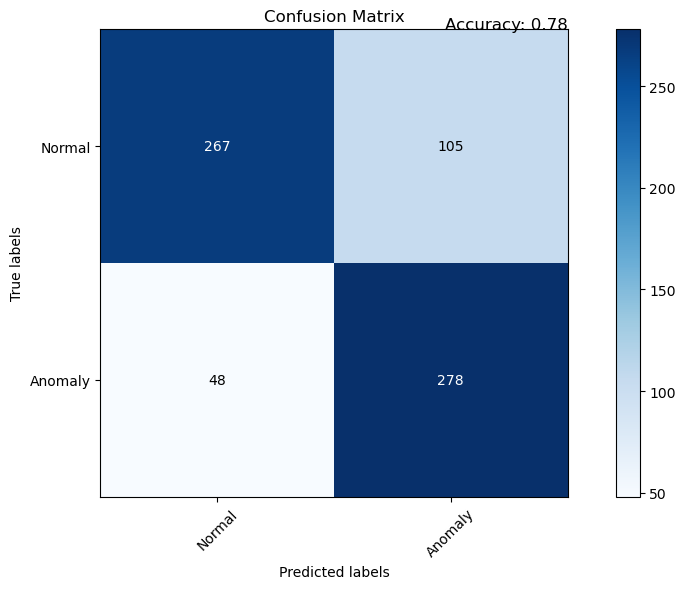

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names
class_names = ['Normal', 'Anomaly']

# Calculate accuracy
accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Add counts to each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

# Add accuracy to the plot
plt.text(1.5, -0.5, f'Accuracy: {accuracy:.2f}', color='black', fontsize=12, horizontalalignment='right')

# Eliminate grid lines
plt.grid(False)

plt.tight_layout()
plt.show()


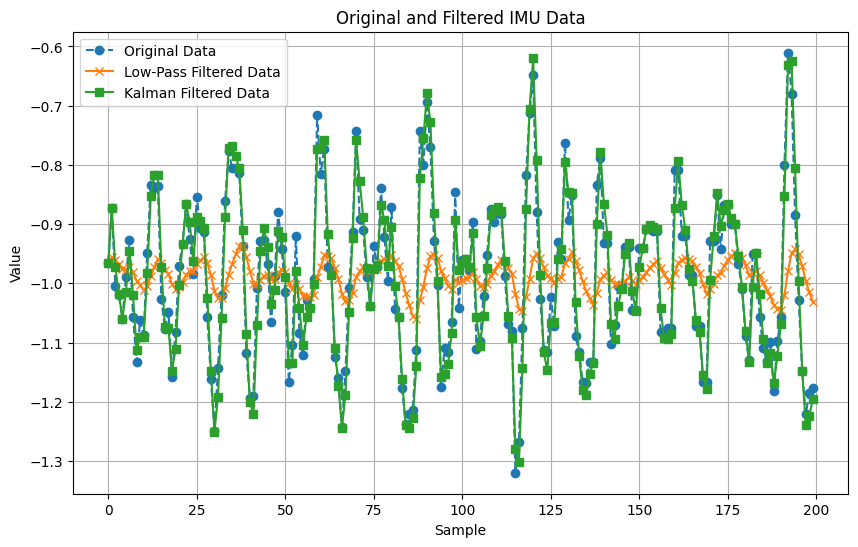

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

# Low-Pass Filter Class
class LowPassFilter:
    def __init__(self, alpha):
        self.alpha = alpha
        self.state = None

    def filter(self, value):
        if self.state is None:
            self.state = value
        else:
            self.state = self.alpha * value + (1 - self.alpha) * self.state
        return self.state

# Kalman Filter Function
def apply_kalman_filter(data, R, Q):
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([0., 0.])  # initial state (position and velocity)
    kf.F = np.array([[1., 1.],
                     [0., 1.]])  # state transition matrix
    kf.H = np.array([[1., 0.]])  # measurement function
    kf.P *= 1000.  # covariance matrix
    kf.R = R  # measurement noise
    kf.Q = Q  # process noise

    filtered_data = []

    for z in data:
        kf.predict()
        kf.update(z)
        filtered_data.append(kf.x[0])  # we are interested in the position

    return np.array(filtered_data)

# Example IMU data (numpy array)
imu_data = np.load('/home/iot/collision_detect/data/imu/normal_train/normal_5/85.npy')[:,-1][:1000]
# Apply Low-Pass Filter
lpf = LowPassFilter(alpha=0.1)
lpf_filtered_data = np.array([lpf.filter(value) for value in imu_data])

# Apply Kalman Filter
R = 0.1  # Example measurement noise
Q = 0.1  # Example process noise
kf_filtered_data = apply_kalman_filter(imu_data, R, Q)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(imu_data, label='Original Data', linestyle='--', marker='o')
plt.plot(lpf_filtered_data, label='Low-Pass Filtered Data', linestyle='-', marker='x')
plt.plot(kf_filtered_data, label='Kalman Filtered Data', linestyle='-', marker='s')

plt.title('Original and Filtered IMU Data')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [61]:
x = np.load('/home/iot/collision_detect/new_data/imu_np/Abnormal/fl/20.npy')[:,-1]
lpf = LowPassFilter(alpha=0.1)
lpf_filtered_data = np.array([lpf.filter(value) for value in x])

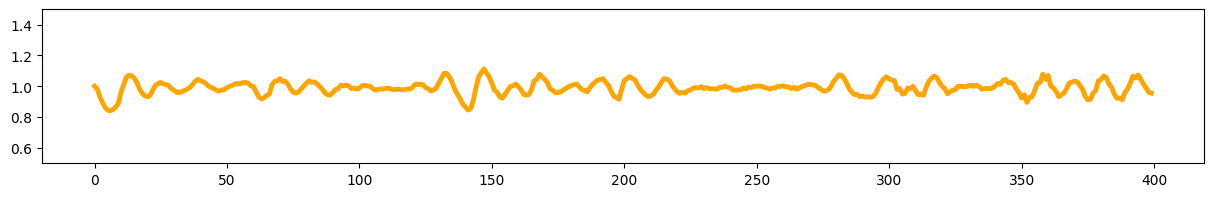

In [66]:
plt.figure(figsize=(15, 2))
plt.ylim(0.5,1.5)
plt.plot(lpf_filtered_data,color='orange',linewidth=3.5)

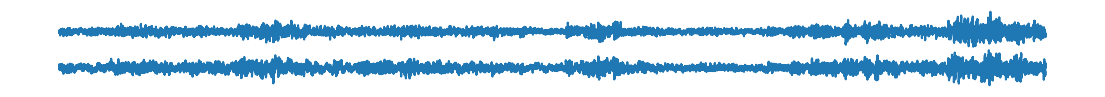

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Load the audio data
audio_data = np.load('/home/iot/collision_detect/new_data/audio_np/Abnormal/fl/20.npy')

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 1))

# Plot the first audio signal
axs[0].plot(audio_data[0])
axs[0].axis('off')  # Turn off the axis
# axs[0].set_ylim(-0.1, 0.1) 
# Plot the second audio signal
axs[1].plot(audio_data[1])
axs[1].axis('off')  # Turn off the axis
# axs[1].set_ylim(-0.1, 0.1) 
# Adjust layout to have no space between plots
plt.subplots_adjust(hspace=0.001)

# Display the plot
plt.show()
